In [1]:
# Podatkovno rudarjenje ocena vrednosti hiš

# Priprava podatkov

In [2]:
import numpy as np
import operator
import matplotlib.pyplot as plt

vsi_podatki = np.loadtxt('data/train.csv', delimiter=",", skiprows=1,dtype=np.str,encoding="UTF8")

stevilo_soseske = dict()
cene_prodaj = dict()
povprecne_cene = dict()

In [3]:
from csv import DictReader

sale_price_gr_liv_area = []
reader = DictReader(open('data/train.csv', 'rt', encoding='utf-8'))
for row in reader:
    sale_price_gr_liv_area.append([int(row["SalePrice"]),int(row["GrLivArea"])])

In [4]:
# 12 soseska 
# 80 cene

for i in vsi_podatki:
    if i[12] in stevilo_soseske:
        stevilo_soseske[i[12]] += 1
    else:
        stevilo_soseske[i[12]] = 1
        
    if i[12] in cene_prodaj:
        cene_prodaj[i[12]] += int(i[80])
    else:
        cene_prodaj[i[12]] = int(i[80])

for i in cene_prodaj:
    povprecne_cene[i] = cene_prodaj[i]/stevilo_soseske[i]   
    
cene_sort = sorted(povprecne_cene.items())
sortirano = sorted([[c, povp] for povp, c in cene_sort])

naselja_sortirana_po_ceni=np.array(sortirano)
naselja_sortirana_po_ceni.shape

(25, 2)

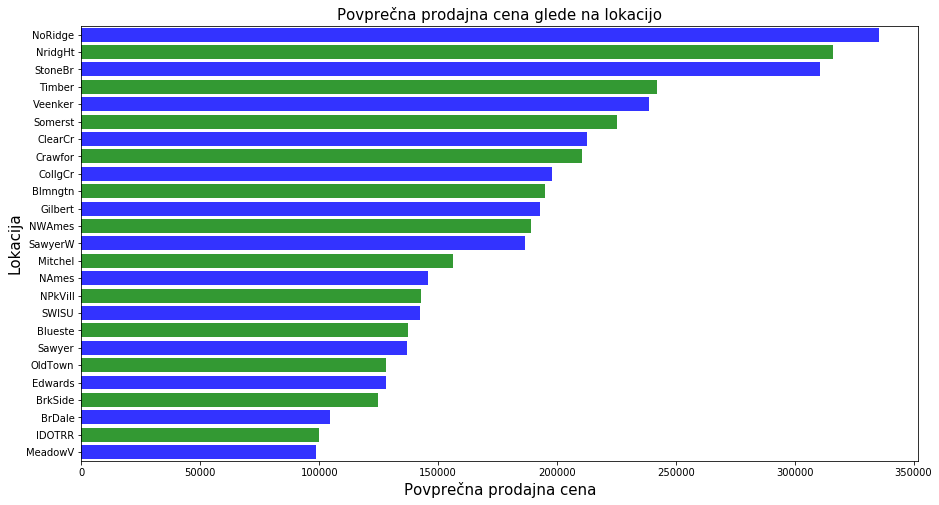

In [5]:
'''
m = naselja_sortirana_po_ceni[:,0].astype('float')
x = range(len(naselja_sortirana_po_ceni[:,1]))
fig=plt.figure(figsize=(20, 12), dpi= 85, facecolor='w', edgecolor='k')
plt.bar(x, m, align='center')
plt.xlim(-0.5, len(naselja_sortirana_po_ceni[:,1])-0.5)
plt.xticks(x)
plt.gca().set_xticklabels(naselja_sortirana_po_ceni[:,1], rotation=90);
plt.title('Povprečna prodajna cena glede na lokacijo', fontsize=15)
plt.xlabel('Lokacija', fontsize=15)
plt.ylabel('Povprečna prodajna cena', fontsize=15);
plt.show();
'''
plt.figure(figsize=(15,8))
x=naselja_sortirana_po_ceni[:,0].astype(float)
y=naselja_sortirana_po_ceni[:,1]
plt.barh(y,x,align='center', alpha=0.8 , color=['b','g'])
plt.ylim(-0.5, len(y)-0.5)
plt.title('Povprečna prodajna cena glede na lokacijo', fontsize=15)
plt.xlabel('Povprečna prodajna cena', fontsize=15);
plt.ylabel('Lokacija', fontsize=15)
plt.show();

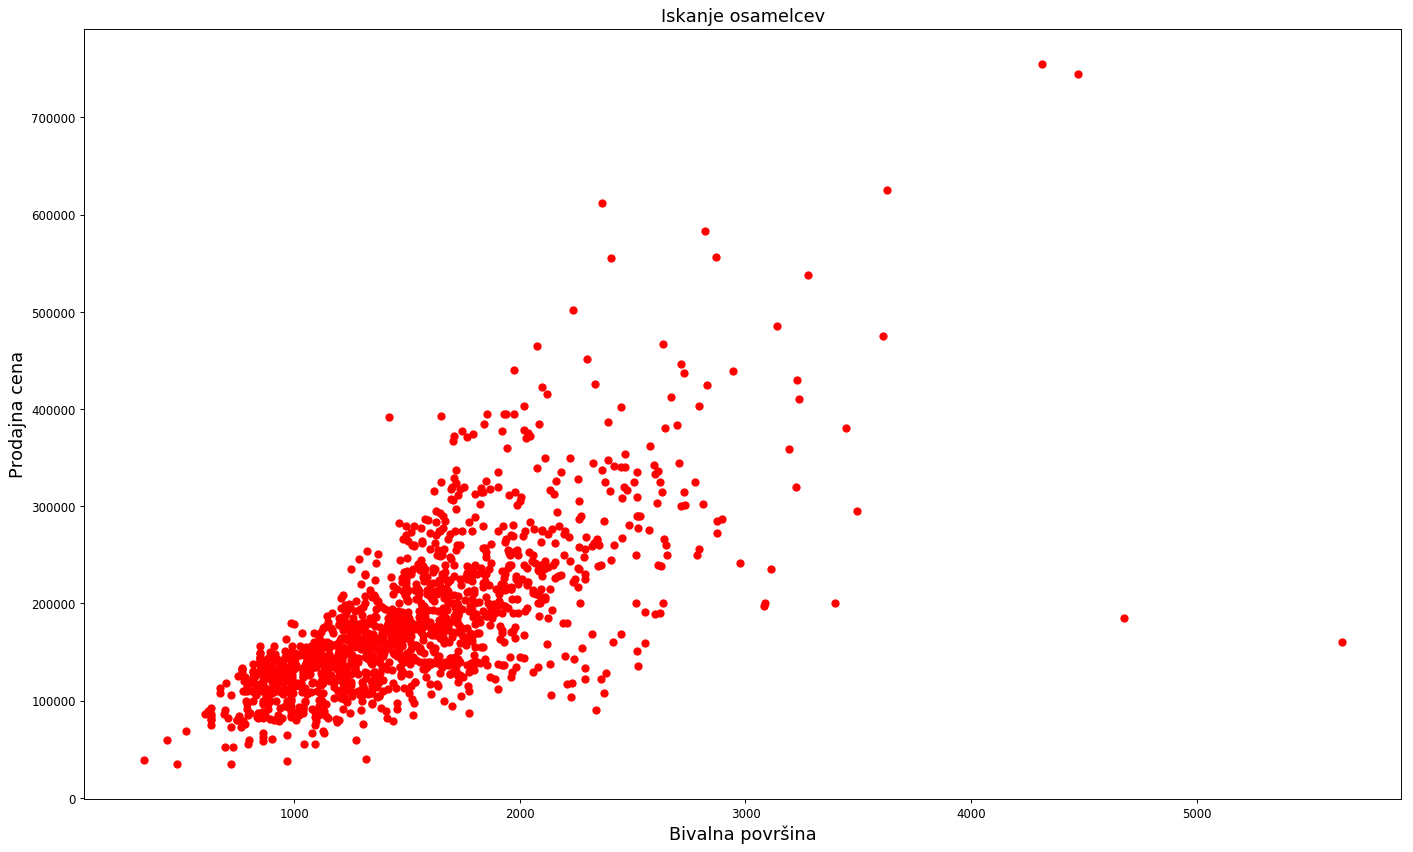

In [6]:
#iskanje najcenejših hiš glede na kvadraturo bivalnih prostorov. Osamelcev

data = np.array(sale_price_gr_liv_area)
x = data[:, 1]    # cena
y = data[:, 0]    # površina

fig=plt.figure(figsize=(20, 12), dpi= 85, facecolor='W', edgecolor='k')
plt.scatter(x, y, color="R")
plt.ylabel('Prodajna cena', fontsize=15)
plt.xlabel('Bivalna površina', fontsize=15)
plt.title('Iskanje osamelcev', fontsize=15)
plt.show();